<img src="img/logo_wiwi_en_.png" width="30%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Combining OR and Data Science

**Summer Term 2024**


# 2. Introductory Case Study, Representing and Computing with Uncertain Quantities




<br>

<br>
<br>

**J-Prof. Dr. Michael Römer, Till Porrmann, Mohsen Nafar**

**Decision Analytics Group  | Bielefeld University**
                                                    
                                                


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Overview

- Introducing a case study
- Representing uncertainty
- Computing with uncertain quantities
- Decision-making under uncertainty


## A First (and Recurring) Case Study: Capacity Planning


We will consider the following case study:

<blockquote>
    
A marketing manager is asked by her boss to forecast demand for a new-generation microchip. The manager builds a Data Science model: She forecasts that  demand will lie between 50,000 and 150,000 units.
        
However, the boss insists:

"Give me a **number**! My people need to build a production line with a certain capacity!"
     
The marketing manager provides him with her best guess - the average, that is, 100,000 units 
</blockquote> 

## Case Study: The Boss' Spreadsheet

The boss plugs that number into his calculation spreadsheet and is
happy:

<img src="img/CaseStudyDeterministicSpreadsheet.PNG" width="40%" align="centert">

**Question:** How can we compute the total profit for a given installed capacity and demand?

## Case Study: A Simple Model

**Calculating total profit**

Total Profit = - Capacity Installation Cost + Margin from Sales

**A simple model**

Total Profit $g = f (x, d) = −30x + 40\cdot$min$(x, d)$

where

$x$: installed capacity in units (decision)

$d$: demand in units


In Python:

In [26]:
def total_profit(capacity, demand):    
    return -30*capacity + 40* min(capacity, demand)

## Case Study: The Boss' Deterministic Decision

- The boss uses a given estimated demand $d = 100$ <br> 
(to enhance readability, we calculate with units of 1000 items ),

-  Using $x := d$ results in:

Total Proﬁt $g = f (100, 100) = 1000$

In [34]:
demand = 100
capacity = 100
total_profit(capacity, demand)

1000

The determinstic case is easy - but what to do in case of **uncertain demand**?

## Overview: Part I of the course

**Combining OR and Data Science for Planning under
Uncertainty**

We learn how to solve the capacity planning problem (and more): 
- Representing uncertainty: Probability distributions and how
to obtain them
- Calculating under uncertainty: Computing functions of
uncertain variables
- Deciding under uncertainty: Taking "simple" decisions
under uncertainty
- Optimizing under uncertainty: Chance-constrained and
Stochastic Programming
- Learning and optimizing under uncertainty: Combining
Machine Learning and Optimization under Uncertainty

## Decision Making under Uncertainty

**Planning and decision making aﬀects the future**
- e.g., we decide upon installing capacity aﬀecting future
production volume

**In general, the future is aﬀected by uncertainty**
- e.g., customer demand is not known in advance

→ **Planning and decision making under uncertainty is the rule,
not an exception or some special case**

## Dealing with Uncertainties


Let us assume that we have a decision-making problem or process.


If **important parameters** such as demand or
resource availability are affected by **uncertainty**, we may represent them by:
- point estimates such as averages (or predictions from an ML model)
- scenarios (best case, average case, worst case) without
probabilities
- (approximations of) probability distributions

## Representing Uncertain Numbers with Point Estimates

Use a single value for each uncertain parameter 
- estimate the expected value
- plug it into a deterministic decision-making model
- often called **predict-then-optimize**

**Disadvantages:**
- ignores diﬀerent outcomes and their probabilities
- in general, leads to the ﬂaw of averages - does not yield the
expected outcome of a decision

... not the best approach, but widely used in practice 

## A Limited Number of Scenarios

**Create a limited number of (unweighted) scenarios**
- e.g.: worst case, average, best case
- in general, scenarios are not assigned probabilities
- mainly used for **what-if-analyses**

**Disadvantages:**
- for each scenario, a diﬀerent decision may be optimal
- little guidance on how to take a ﬁnal decision

## Using Probability Distributions

#### Our approach will be to
- represent uncertain quantities by **probability distributions** (distributional instead of point forecasts)
- compute with probability distributions using **Monte Carlo / sample approximations** 
- determine decisions using **enumeration**, **unconstrained optimization** and **stochastic linear programming**


## Back to the Case Study: Dealing with Uncertain Demands

- from the case study description, we know that demand is not a deterministic value $d$, but affected by uncertainty
- in that case, what total profit can the boss expect for his capacity decision?
- in case of uncertainty, is installing a capacity of 100 really the best decision?

#### To answer these questions, we will need to
- model the uncertain demand
- be able to compute a function with an argument affected by uncertainty
- find a way to determine the capacity decision with the best expected profit
 

  

## Representing Uncertainty using Distributions

In this course, we will represent uncertainty using **Probability Distributions**

Given a  **random variable**
- with a discrete (finite) or continuous **sample space (state space)** of possible outcomes, 
- a **probability distribution**  gives the **probabilities** of these outcomes such that 
- the total probability of all outcomes is 1

**Probability Distributions in Python**

- in Python, there are various libraries implementing distributions
- we will use *Scipy Stats* here



## Discrete Distributions


For a **discrete** random variable $X$ with state space $\mathcal{X}$

- the *probability mass function* $p(x)$ gives the probability of
  obtaining value $x \in \mathcal{X}$ 
- the *cumulative distribution function* $F(x)$ gives the probability
  of obtaining a value smaller than $x$, or, more formally: $F(x) = \sum\limits_{a\in\mathcal{X}:a \leq x} p(x)$

**Example: Binomial Distribution** 

Text(0.5, 1.0, 'Cumulative Distribution Function')

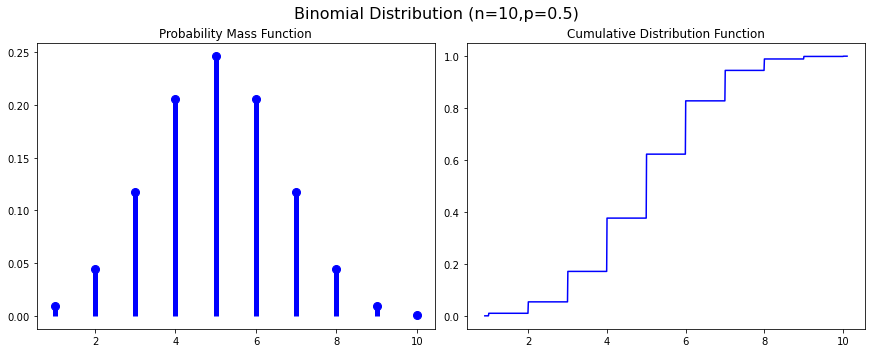

In [36]:
from scipy.stats import binom

#distribution parameters
n, p = 10, 0.5

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8), constrained_layout=True)
fig.suptitle(f'Binomial Distribution (n={n},p={p})',fontsize=16)

xx = np.arange(binom.ppf(0.01, n, p), binom.ppf(1, n, p)+1) # the range of x-values to display, (ppf is the inverse cumulative distribution function.)

ax1.plot(xx, binom.pmf(xx, n, p), 'bo', ms=8)
ax1.vlines(xx, 0, binom.pmf(xx, n, p), color='b', lw=5) # pmf is the probability mass function
ax1.set_title('Probability Mass Function')

xx = np.linspace(binom.ppf(0.01, n, p)-0.1, binom.ppf(1, n, p)+0.1,1000)
ax2.plot(xx, binom.cdf(xx, n, p), 'b')
ax2.set_title('Cumulative Distribution Function')

## Continous Distributions

For a **continuous** random variable $X$ with state space $\mathcal{X}$

- the **cumulative distribution function** $F(x)$ gives the probability
  of a value smaller than $x$: $F(x) = p(X \leq x)$ 
- the **probability density function** $f(x)$ is the derivative of
  $F(x)$ and can be used to calculate the probability of obtaining a value $x$ within an interval $[a,b]$, that is, 
  $p(a\leq x \leq b)$: 


  $$\int_a^b f(x) dx = F(b) - F(a)$$
  

#### Example: Normal Distribution

Text(0.5, 1.0, 'Cumulative Distribution Function')

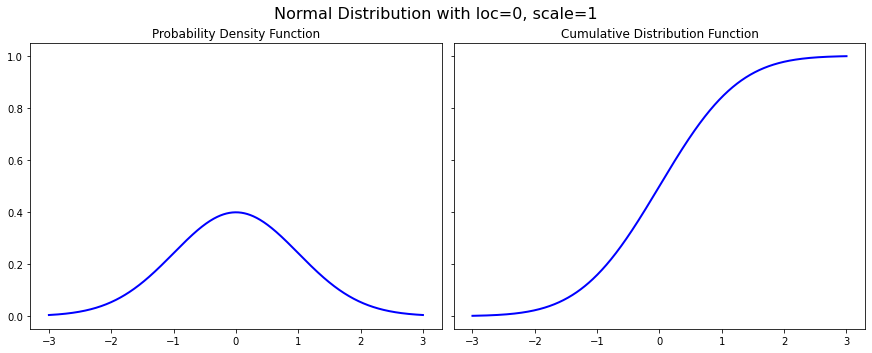

In [38]:
from scipy.stats import norm

#parameters
loc = 0 # mean
scale = 1 # standard deviation

normal_dist = norm(loc,scale) ## here, we "freeze" the distribution

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8), constrained_layout=True, sharey=True)
fig.suptitle(f'Normal Distribution with loc={loc}, scale={scale}',fontsize=16)

xx = np.linspace(-3, 3, 1000)

ax1.plot(xx, normal_dist.pdf(xx), linewidth=2, color='b')
ax1.set_title('Probability Density Function')

ax2.plot(xx, normal_dist.cdf(xx), linewidth=2, color='b')
ax2.set_title('Cumulative Distribution Function')

## Distribution Statistics

#### Some statistics and how to compute them for discrete distributions:

- **Expected Value / Mean**: $\mu = E(X) = \sum\limits_{x \in\mathcal{X}} p(x)x$
- **Variance**: $\sigma^2 = E((x-\mu)^2) = \sum\limits_{x \in\mathcal{X}} p(x)(x-\mu)^2$ 
- **Standard deviation**: $\sigma$
- **Mode:** $\arg \max\limits_{x \in \mathcal{X}} p(x)$
- **$\alpha$-quantile**: $x_\alpha:P(X\leq x_\alpha) = F^{-1}(\alpha)$ 
- **Median:** 0.5-quantile


In **scipy.stats**, we can obtain these statistics as follows:

In [11]:
print(f'Expected value: { normal_dist.mean() }, variance: { normal_dist.var() }, standard deviation: { normal_dist.std() }')
print (f'Quantiles: 0.05: { normal_dist.ppf(0.05) }, 0.5(median): { normal_dist.median() }, 0.05: { normal_dist.ppf(0.95) }')

Expected value: 0.0, variance: 0.25, standard deviation: 0.5
Quantiles: 0.05: -0.8224268134757364, 0.5(median): 0.0, 0.05: 0.8224268134757361


## Parametric Distributions
- the distributions we saw so far form so-called **parametric distributions**
- they all have different assumptions and "stories" - it is good to know at least some basic properties about distributions
- a great web resource for parametric distributions and their stories is the [Distribution Explorer](https://distribution-explorer.github.io/)
- if we have data, we can select a distribution and fit it to the data (estimate the best parameters), e.g. using the `fit` function from scipy.stats
- if we do not find a parametric distribution that fits to the data, we may as well resort to **non-parametric** distributions

**Caution**: Fitting a single distribution to a given data set assumes that the data is **i.i.d.** (independent and identically distributed)


## An Example for Useful Knowledge About Distributions

<img src="img/normal_rule.png" width="40%" align="center">

- **68-95-99.7 Rule:** Shorthand rule to remember the percentage of probability mass that lies around the mean.

## Back to the Case Study

Let us assume that in the case study, the data scientist considers modeling demand as a **Normal Distribution**:
- the data scientist does not think that each demand is equally likely
- she thinks that the mean is 100 000 
- she assumes that the distribution is symmetric
- and about 2/3 of the probability mass lies within 100 000 $\pm$ 25 000 $\rightarrow$ $\sigma$ = 25000



In [49]:
expected_demand = 100
standard_devation_demand = 25
demand_dist = stats.norm(expected_demand, standard_devation_demand)

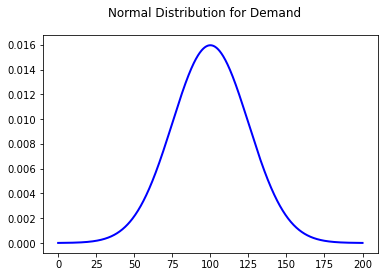

In [50]:
xx = np.linspace(0, 200, 1000)
plt.plot(xx, demand_dist.pdf(xx), linewidth=2, color='b', label='pdf')
plt.suptitle('Normal Distribution for Demand')

plt.show()

## Case Study: All set?


So now, we know that our expected demand is 100. Let us assume, that, following the boss, we install a capacity of 100.

- can we simply plug the expected demand into our function for computing the total profit?
- what will be the distribution of the profits?
 - what is the variance of the profit?
 - how likely is it that we earn less than \\$ 500? 


**We will start answering these types of questions next**

# Computing with Uncertain Quantities

## Computing Functions of Random Variables

#### The problem we address is:

Given an arbitrary function $f(d)$ with a parameter $d$ (or multiple
parameters) and a random variable $D$ (or multiple random variables),
what is the distribution of $Y = f(D)$? 


#### Analytically?
- There are analytical techniques like the so-called *change of variables* method,
- but they quickly become difficult in case of involved multi-variate problems.


## Computing Functions of Random Variables

#### The problem we address is:

Given an arbitrary function $f(d)$ with a parameter $d$ (or multiple
parameters) and a random variable $D$ (or multiple random variables),
what is the distribution of $Y = f(D)$? 


#### Analytically?
- There are analytical techniques like the so-called *change of variables* method,
- but they quickly become difficult in case of involved multi-variate problems.


### Sampling From Distributions
- many techniques in computational statistics are based on *sampling*,
  that is, on drawing random samples from a distribution
  - imagine "rolling a die"
- these samples are used for transforming distributions and performing
  probabilistic inference

#### Example: Sampling from a Normal Distribution:

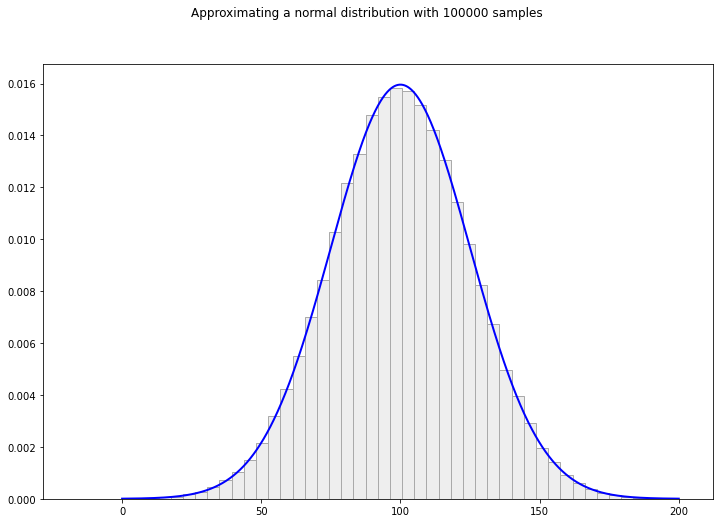

In [48]:
number_of_samples= 100000
demand_samples = demand_dist.rvs(number_of_samples)
xx = np.linspace(0, 200, 1000)

plt.figure(figsize=(12,8))
plt.plot(xx, demand_dist.pdf(xx), linewidth=2, color='b', label='pdf')
plt.hist(demand_samples, bins=50, density=True, color='#EEEEEE', edgecolor="#AAAAAA")
plt.suptitle(f'Approximating a normal distribution with {number_of_samples} samples')
plt.show()

**Task:** Play with the sample size to see the effect on approximation quality!

### Sampling From Distributions
- let us see the sampling function in more detail:


In [89]:
number_of_samples = 100000
demand_samples  = demand_dist.rvs(number_of_samples)

- let us see how well the expected value is approximated:


In [90]:
print( f"True expected value { demand_dist.mean() } ")

approximate_mean = np.mean( demand_samples )

print( f"Approximate expected value for {number_of_samples} samples is { approximate_mean } ")

print( f"Approximate 0.05 Quantile for {number_of_samples} samples is { np.percentile(demand_samples,5)} ")

True expected value 100.0 
Approximate expected value for 100000 samples is 99.98772362765031 
Approximate 0.05 Quantile for 100000 samples is 58.97399176868489 


## Monte-Carlo-Simulation / -Approximation for Computing with Random Variables

#### The key idea
- use sampling to approximate the **result distribution** of a function $f$
- by simply computing the $f$ for a sampled observations from the distributions of the uncertain
  (input) parameters

#### In our capacity planning example
- let $d_s$ be a sample from the demand distribution
- then $g(x)_s = f(x,d_s)$ is a sample from the distribution of the total profit for a given capacity decision $x$
- we can thus approximate the expected  profit $E(G(x))$ of installing a capacity $x$ as:

  $$E(G(x)) \approx \frac{1}{|S|} \sum_{s \in S} g(x)_s = \frac{1}{|S|} \sum_{s \in S} f(x,d_s)$$

### Monte-Carlo Simulation for our Case Study: A First Implementation

Here, we implement a first loop-based implementation of a Monte-Carlo Simulation for our example case study:
- we draw a new random number in each iteration of a for loop 
- and store the profit sample in an array


In [98]:
demand_dist = stats.norm(100,25) # demand distribution
capacity = 100 # given capacity decisions
n_samples = 100000

profit_samples = np.zeros(n_samples) # initialize the result array

# the simulation loop
for s in range(n_samples):
    profit_samples[s] = total_profit(capacity, demand_dist.rvs())

expected_profit = np.mean(profit_samples)

print(f'The estimated expected profit is: {expected_profit:.2f}')

The estimated expected profit is: 602.00


## Plotting the Distribution of the Total Profit

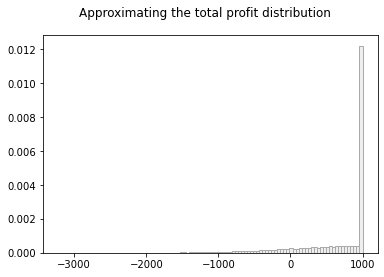

In [101]:
xx = np.linspace(0, 200, 1000)

plt.figure()
plt.hist(profit_samples, bins=100, density=True, color='#EEEEEE', edgecolor="#AAAAAA")
plt.suptitle(f'Approximating the total profit distribution')

plt.show()


## Plotting the Total Profit as a Function of the Demand for a Capacity of 100

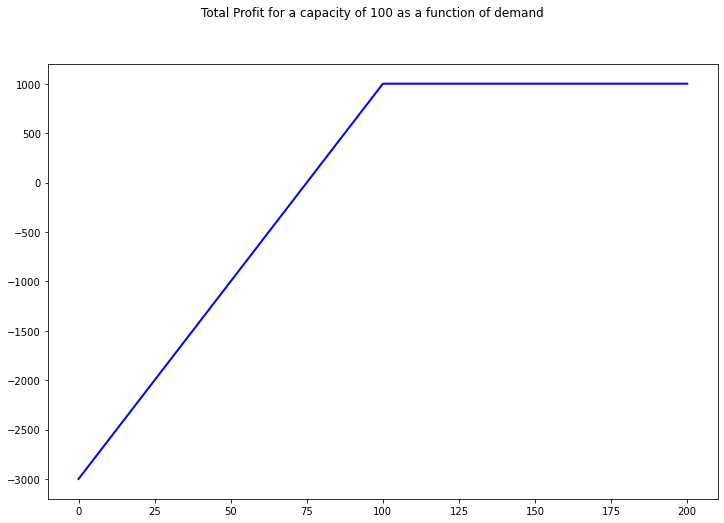

In [14]:
xx = np.linspace(0, 200, 1000)

profits = [total_profit(100, demand) for demand in xx]
    
plt.figure(figsize=(12,8))
plt.plot(xx, profits , linewidth=2, color='b', label='pdf')
plt.suptitle(f'Total Profit for a capacity of 100 as a function of demand')
plt.show()   

### The Flaw of Averages


#### The boss was wrong:
While the boss' calculation returned a profit of around \\$ 1 m,
our simulation reveals that the expected profit is only around \\$ 600 tsd 

$\rightarrow$ The boss is a victim of the **Flaw of Averages**:

<div class="alert alert-block alert-info">
<b>The Flaw of Averages:</b> The results obtained when replacing uncertain quantities with averages are wrong on average. </div>

> In general, if $D$ is an random variable, and f is a nonlinear function, then 
> $$f(E(D)) \neq E(f(D))$$
> Plugging an average/expected value of an random variable into a function does **not** yield the expected value of that function!

    


## Do we always overestimate?

Your company is considers purchasing  a natural gas reservoir
containing a million units of gas. At the moment, the gas price is
\\$10, and it costs you \\$9.50 to pump a unit of gas to the market.  

The gas price is uncertain and the reservoir can only start
operating in a month. At that time, the price may be multiple dollars
higher or lower than \\$10.

Your boss wants you to estimate the gas price in one month in order to
valuate the reservoir. In particular, he wants a point estimate: The expected gas price.



**Excercise:** 
- Assume that next month's gas price follows a normal distribution with $\mu = 10$ and $\sigma = 3$
- Flaw of averages analysis: Compare the value of the reservoir
  obtained by calcuating with the expected price to its (Monte-Carlo-approximated) true value
- Consider that in case of low prices, you have the option *not* to   pump gas
- Plot the reservoir value as a function of the gas price

In [1]:

def value_of_the_reservoir (gas_price):
    ## parameter values here
    cost_pumping = 9.5
    units_in_reservoir = 1000000

    ## fill the rest of the function
    
    return 0
 


## Plotting the Reservoir Value as a Function of the Gas Price

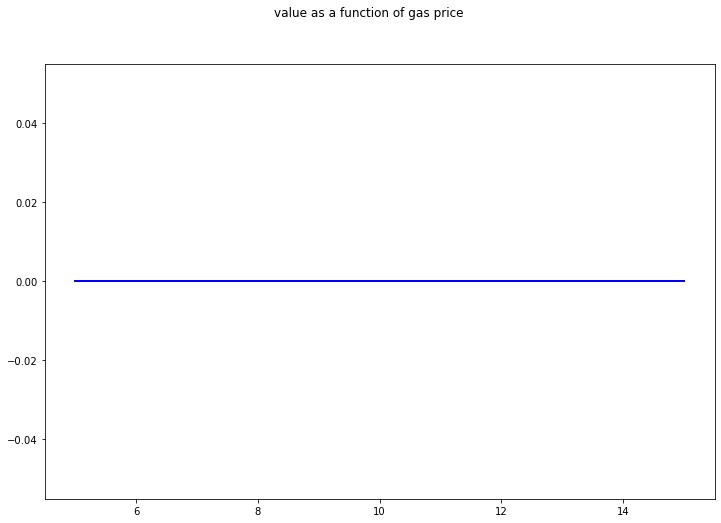

In [4]:
xx = np.linspace(5, 15, 1000)

values = [value_of_the_reservoir(price) for price in xx]
    
plt.figure(figsize=(12,8))
plt.plot(xx, values, linewidth=2, color='b', label='pdf')
plt.suptitle(f'value as a function of gas price')
plt.show()   

## Vector-Oriented Monte Carlo Approximation
- our first implementation was based on drawing random demands **within** a for-loop
- an equivalent implementation would be to draw an array (a vector) of random demands **beforehand** and use them in the implementation
- this is useful for
  - reproducibility
  - variance reduction (common random numbers) when using a Monte-Carlo approximation for decision-making / optimization
  - efficient vectorized implmementations of Monte-Carlo approximations

**Some Notation:**

Given a random variable, e.g. the random demand $D$
- $d_s$ is the sample with index $s$
- $[d_s]_{s \in S}$, shortly written as $[d_s]$,  is the sample vector $\begin{bmatrix} d_1 \\ \vdots \\ d_{|s|} \end{bmatrix}$
- if the context is clear, we may also use $\mathbf{d} := [d_s]$

where 

- $|S|$ is the number of samples / scenarios
- $S$ is the (ordered) index set of samples, $S = \{1\ldots |S| \}$


## Vector-Oriented Monte Carlo


Given 
- a deterministic function $f(d)$  and 
- a random variable (a probability distribution)  $D$
we wish to compute the distribution $G = f(D)$ 


Let $\mathbf{d} = [d_s]$ be a vector of samples from $D$. 

We obtain a Monte Carlo approximation $\mathbf{g}$ of $G$ by applying $f$ **element-wise:** 

$\mathbf{g} = [g_s] = \begin{bmatrix} g_1 \\ \vdots \\ g_{|s|} \end{bmatrix} = [f(d_s)] = \begin{bmatrix} f(d_1) \\ \vdots \\ f(d_{|S|}) \end{bmatrix}$ 


We will write $\mathbf{f}$ to indicate element-wise
application of $f$ to a vector: 

$\mathbf{g} = \mathbf{f}(\mathbf{d}) = [f(d_s)]$ 


And we will call $\mathbf{f}$ the **vectorized** version of $f$.


## Illustration: Numerical Example

The deterministic function for computing the total profit given
capacity decision $x$ and deterministic demand $d$: 

$g = f(x,d) = -30x+40 \min(x.d)$ 

Let us fix $x$ to $100$ am the use the sample vector
$\mathbf{d}= \begin{bmatrix} 85 \\ 100 \\ 115\end{bmatrix}$ 


Then, we can compute 
$\mathbf{g} =
 \mathbf{f(100,\mathbf{d})}= 
  \begin{bmatrix} -3000 + 40 \min(100,85)  \\ -3000 + 40 \min(100,100) \\ -3000 + 40 \min(100,115) \end{bmatrix} = 
  \begin{bmatrix} 400 \\ 1000 \\ 1000  \end{bmatrix}$ 

..and we obtain an estimated expected total profit $$\bar{\mathbf{g}}= \frac{1}{|S|} \sum_{s \in S}g_s = 800$$


## Vectorizing your Python Functions: Numba `@vectorize`

#### Numba
- is a just-in-time compiler that turns Python functions to C code
- specializing in Numpy-based code 
- very simple to use since it providess so-called **decorators** you can add to your existing code 

#### Vectorization
- numba provides the decorator `@vectorize` that
  - turns a function taking scalars in to a vectorized function that can support broadcasting (like numpy's ufuncs)
  - is very fast since it just-in-time compiles the code into C code 


## Vectorizing a Function in our Case Study

Take our function $f(x,d) = -30x+40 \min(x,d)$   

In [111]:
def total_profit(capacity, demand):
    return -30*capacity + 40*min(capacity, demand)



Turn it into its vectorized counterpart $\mathbf{f}(x,d)$ by: 
    

In [112]:
from numba import vectorize   
@vectorize
def total_profit_vectorized(capacity, demand):
    return -30*capacity + 40*min(capacity, demand)

The function will now work with every combination of:
- $x$ scalar, vector (array) or matrix (multi-dimensional array)
- $d$ scalar, vector (array) or matrix (multi-dimensional array)

In [115]:
demand_sample = demand_dist.rvs(n_samples)
print(demand_sample)
profit_sample = total_profit_vectorized(capacity, demand_sample)
print(profit_sample)
np.mean(profit_sample)

[126.78213462 100.25323393  93.73409167 ... 135.29097216 100.82411159
  65.96132751]
[1000.         1000.          749.36366661 ... 1000.         1000.
 -361.54689943]


599.2289490358164

## Comparing Speeds

Let us compare computation speed using timeit

In [116]:
def monte_carlo_python_loop():
    profit_samples = np.zeros(n_samples) 
    for s in range(n_samples):
        profit_samples[s] = total_profit(capacity, demand_dist.rvs())
    expected_profit = np.mean(profit_samples)    
    return expected_profit

timeit_result_for_loop = %timeit -o monte_carlo_python_loop()
time_in_sec_for_loop = np.mean(timeit_result_for_loop.all_runs) / timeit_result_for_loop.loops

def monte_carlo_vectorized():
    demand_sample = demand_dist.rvs(n_samples)
    profit = total_profit_vectorized(capacity,demand_sample)
    expected_profit = np.mean(profit)    
    return expected_profit


timeit_result_vectorized = %timeit -o monte_carlo_vectorized()
time_in_sec_vectorized = np.mean(timeit_result_vectorized.all_runs) / timeit_result_vectorized.loops

relative_time_for_loop =time_in_sec_for_loop / time_in_sec_vectorized
print(f'The for loop-based approach took {relative_time_for_loop:.02f} as much time as the vectorized approach')

293 ms ± 4.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
266 µs ± 7.09 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
The for loop-based approach took 1100.84 as much time as the vectorized approach


# Finally: What is the Best Decision?

## Decision-Making under Uncertainty: Formalization

We are looking for
- the decision (or decision vector, or more general, solution) $x$ 
- from the set of possible decisions (solutions) $X$ 
-  yielding the *best* expected outcome $E(f(x,D))$
-  given the uncertain/random variable(s) $D$


We can write this as an **optimization** problem under uncertainty:

$$\max_{x \in X} E(f(x,D))$$

Using Monte Carlo, we approximate $E(f(x,D))$ by the mean of the
 output sample vector $\mathbf{f}(x,\mathbf{d})$, that is by
 $\frac{1}{|S|} \sum\limits_{s\in S} f(x,d_s)$ \\

This results in the following optimization problem:

$$\max_{x\in X} \frac{1}{|S|} \sum\limits_{s\in S} f(x,d_s)$$

## Solving by Enumeration

#### If
- the set $X$ is finite and not too big (there are just few number of decisions / plans to choose from)
- and $\frac{1}{|S|} \sum\limits_{s\in S} f(x,d_s)$ can be computed efficiently

#### ... we can simply 
-  **enumerate** all solutions / decisions  $x \in X$ 
- and *select* one maximizing $\frac{1}{|S|} \sum\limits_{s\in S} f(x,d_s)$

..in our example, we may simply enumerate all (meaningful) capacity decisions $x$, e.g. from 0 to 200.


## Enumeration:  Implementation

**Task:**

Implement a for loop that chooses the best capacity decision and print the best decision and the best expected total profit 
- (you may use the function expected_profit from below)

In [5]:
capacities = np.arange(0,200) # the array / vector with the possible values


def expected_profit(capacity):
    return np.mean(total_profit_vectorized(capacity,demand_sample))




## The Flaw Of Averages and Decision Making

When it comes to *decision making*, we encounter the


<div class="alert alert-block alert-info">
<b>Strong Form of the Flaw of Averages:</b> Decisions and plans based on averages are wrong on average </div>

More formally: In general, if $x$ is a (vector of) decision variable(s), $D$ is an random variable, and f is a nonlinear function, then  
    
$$\underset{x}{\operatorname{argmax}} f(x,E(D)) \neq \underset{x}{\operatorname{argmax}}  E(f(x,D))$$
    

That is, in general, the best average-based decision is usually different and worse than the decision with the best expected performance.

... we will consider decision making under uncertainty in more detail later in the course!


## Conclusions

**Today**
- we had a short tour-de-force in decision-making under uncertainty with implementatios by Python
- using a simple case study

**Next time (in two weeks)**
- we will have a closer look at how to **obtain probability distributions** for our approach to decision-making under uncertainty